In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("clean_df.csv",index_col=0)

In [3]:
df.drop(['city-mpg','highway-mpg','price_binned'],axis=1,inplace=True)

In [4]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,compression-ratio,horsepower,peak-rpm,price,city-L/100km,highway-L/100km,diesel,gas,std,turbo
0,3,0.298429,alfa-romero,two,convertible,rwd,front,0.058309,0.413433,0.324786,...,0.1250,0.294393,0.346939,13495,0.481481,0.421053,0,1,1,0
1,3,0.298429,alfa-romero,two,convertible,rwd,front,0.058309,0.413433,0.324786,...,0.1250,0.294393,0.346939,16500,0.481481,0.421053,0,1,1,0
2,1,0.298429,alfa-romero,two,hatchback,rwd,front,0.230321,0.449254,0.444444,...,0.1250,0.495327,0.346939,16500,0.570175,0.453441,0,1,1,0
3,2,0.518325,audi,four,sedan,fwd,front,0.384840,0.529851,0.504274,...,0.1875,0.252336,0.551020,13950,0.376157,0.336842,0,1,1,0
4,2,0.518325,audi,four,sedan,4wd,front,0.373178,0.529851,0.521368,...,0.0625,0.313084,0.551020,17450,0.621914,0.612440,0,1,1,0


In [5]:
sns.boxplot(x="num-of-doors",y="price",data=df)

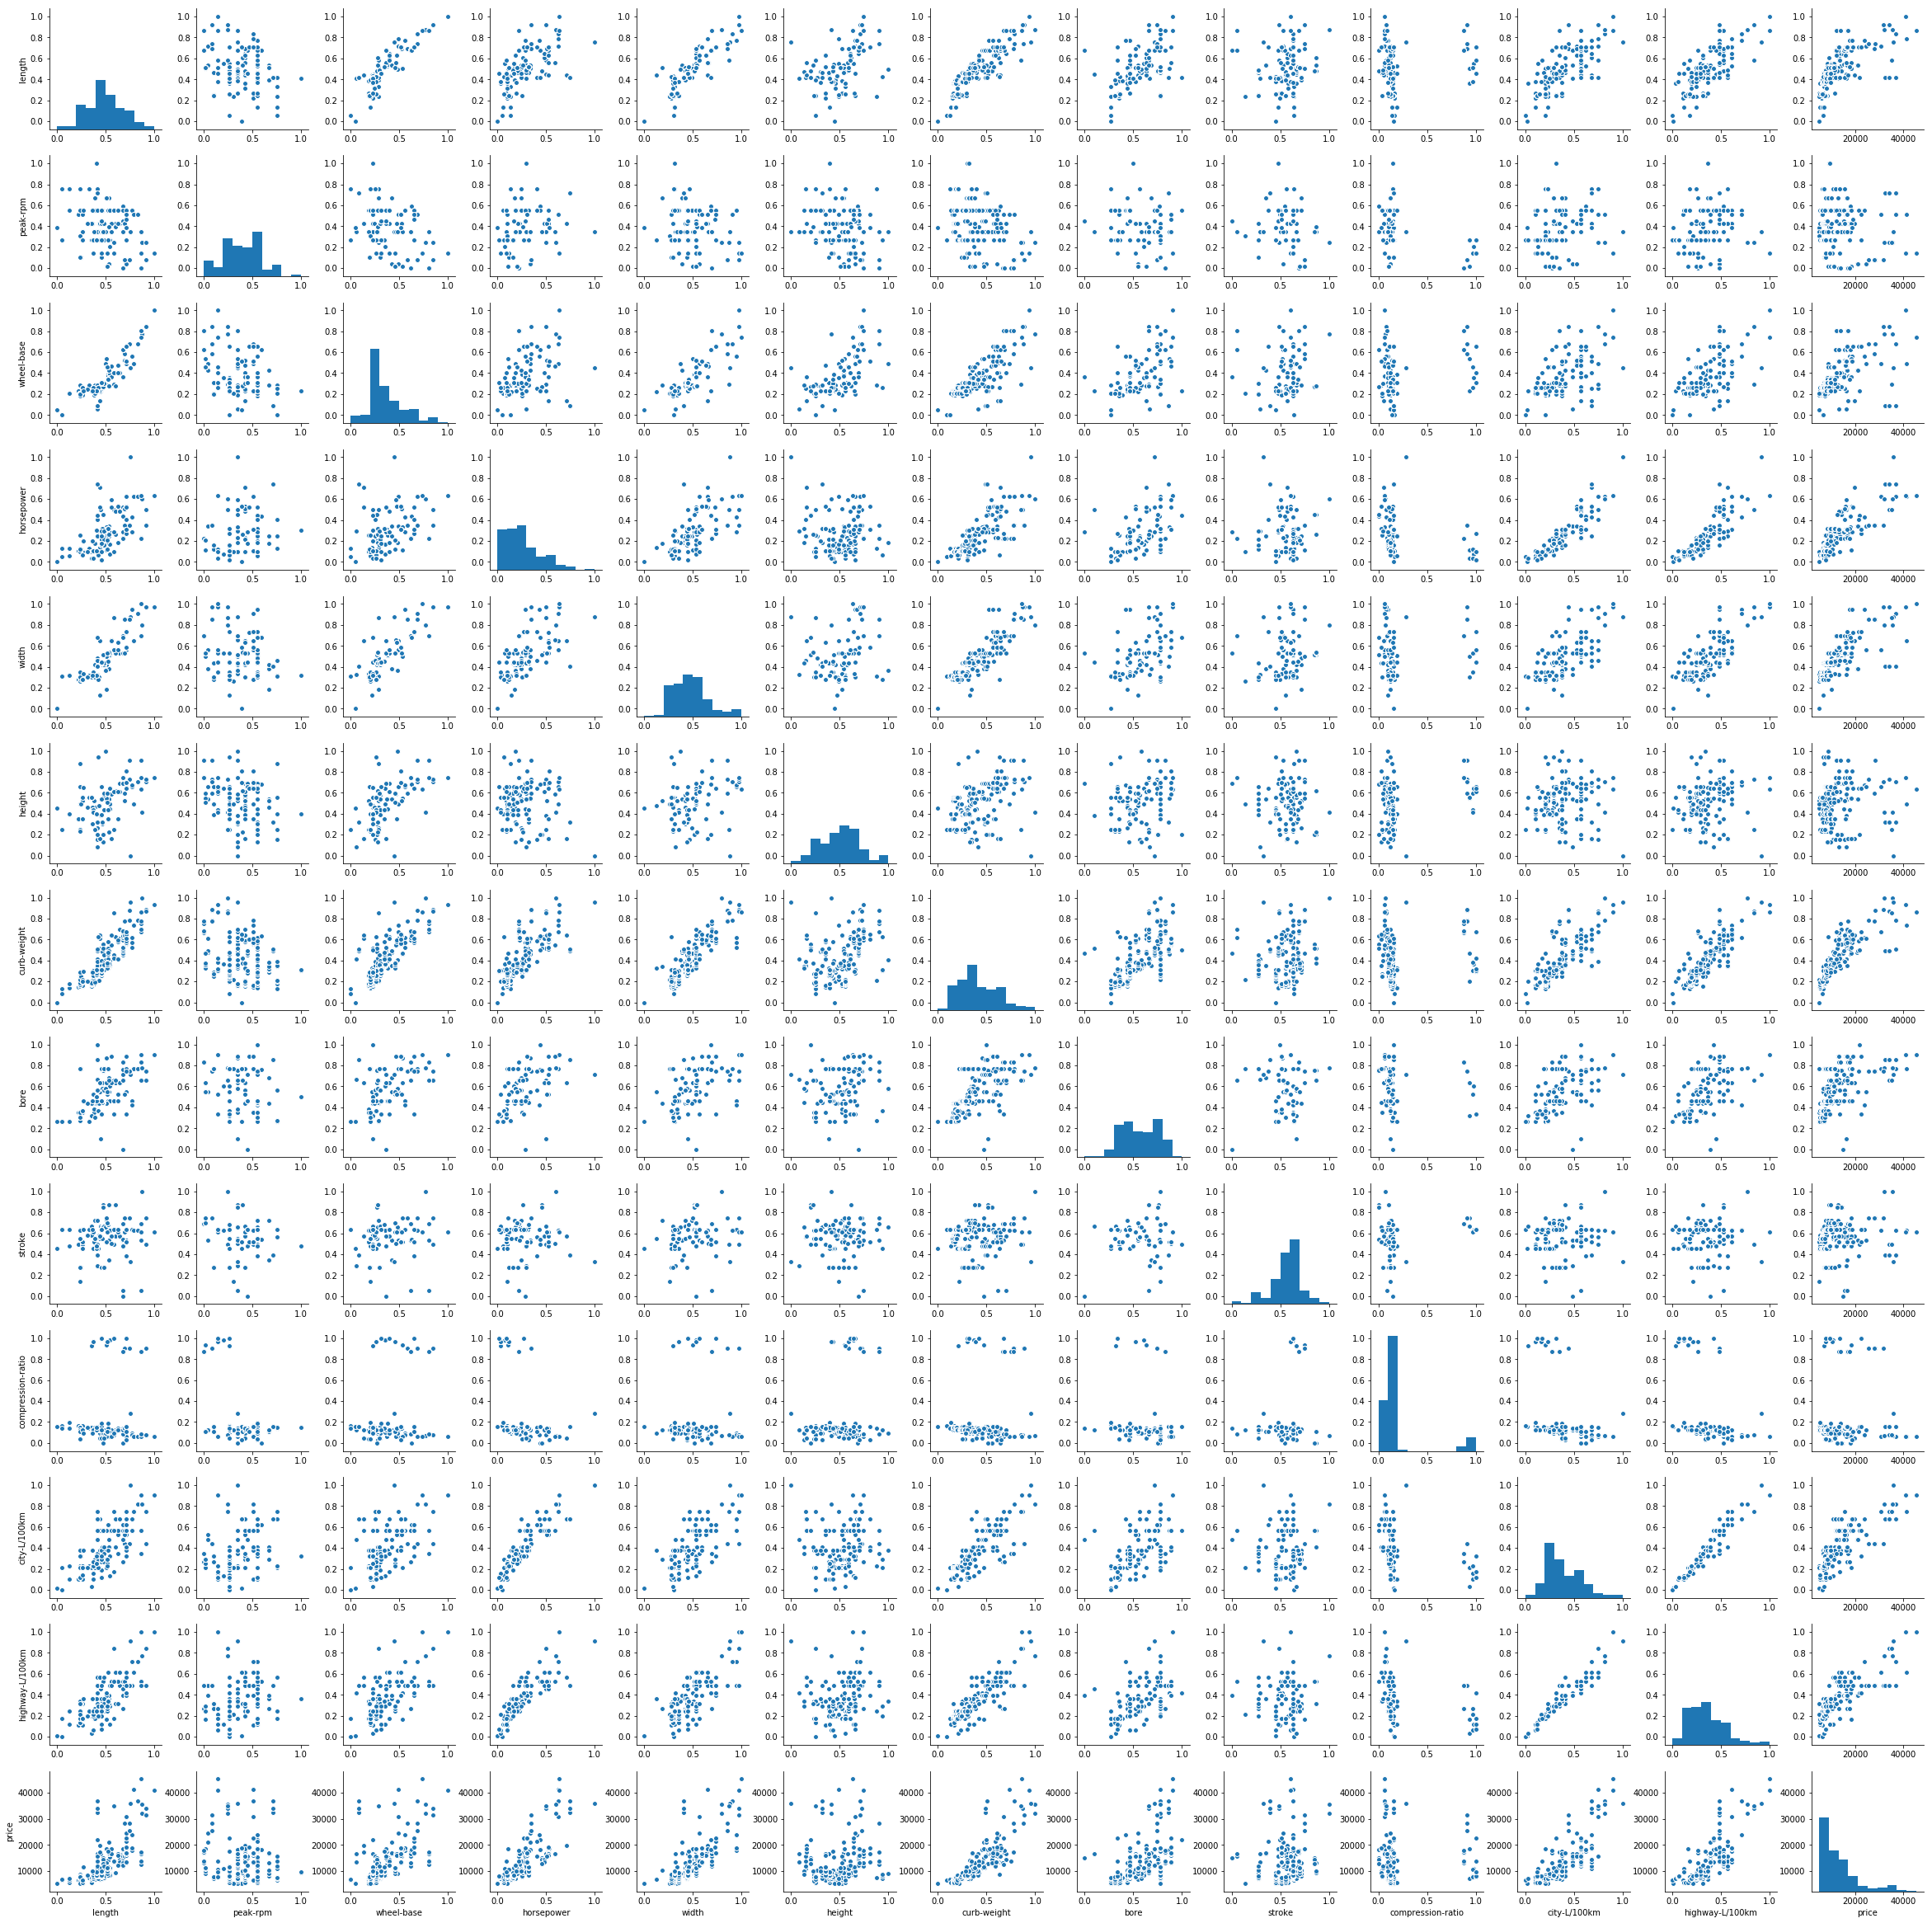

In [6]:
%matplotlib inline

sns.pairplot(df,vars=['length','peak-rpm','wheel-base','horsepower','width',
       'height', 'curb-weight','bore', 'stroke', 'compression-ratio','city-L/100km', 'highway-L/100km','price'])



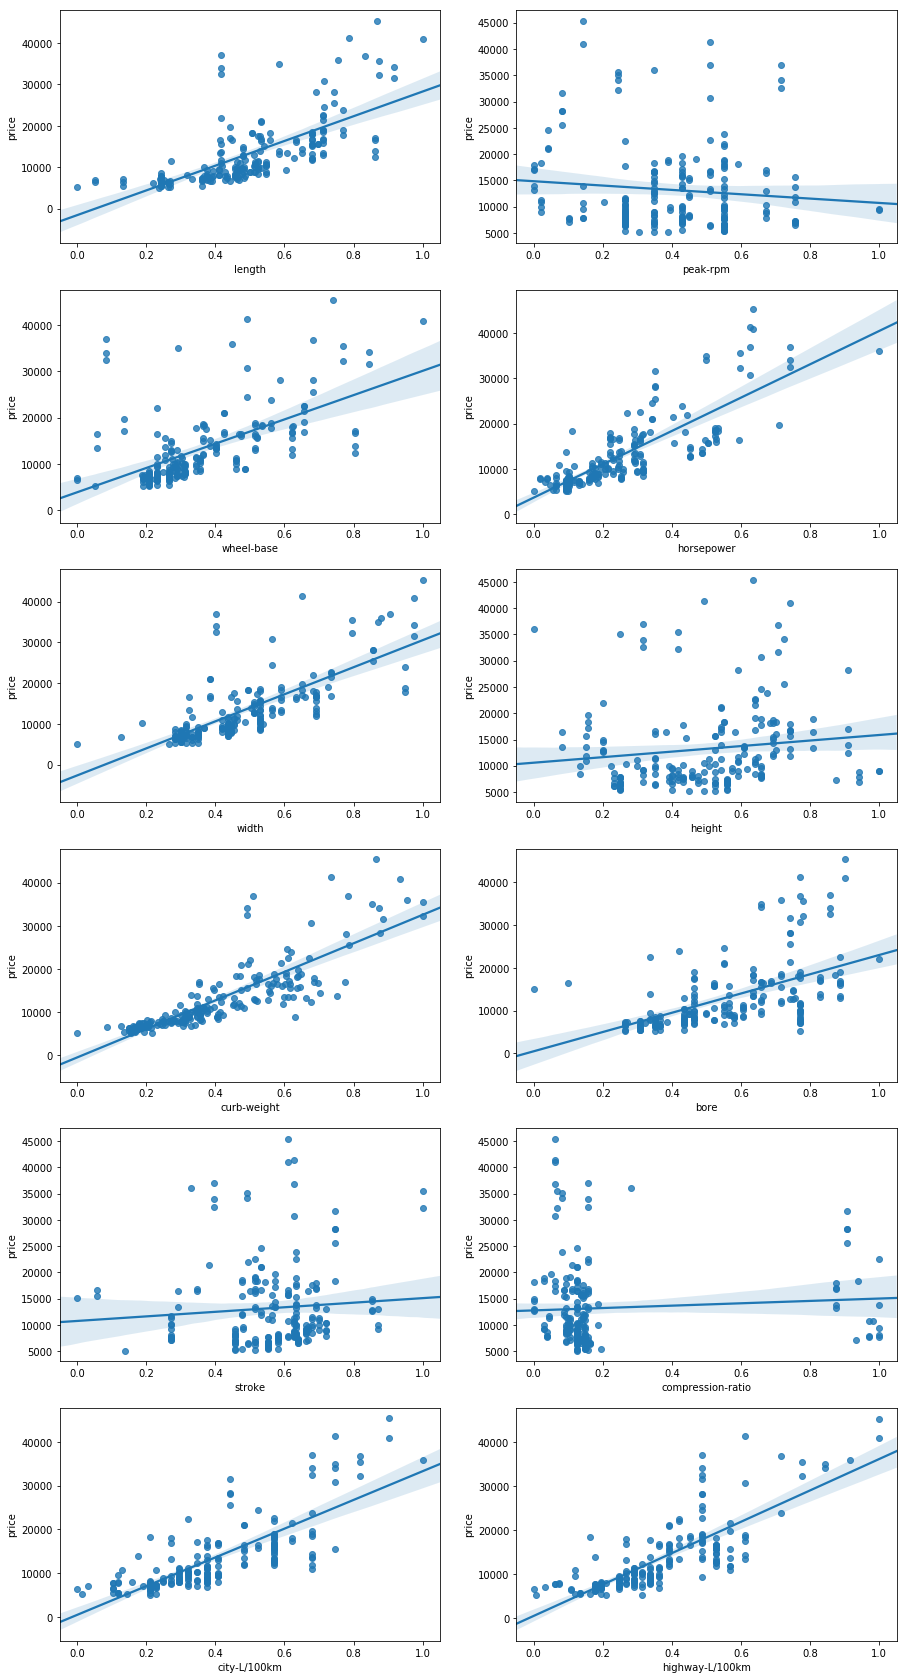

In [7]:
%matplotlib inline

columns_x=['length','peak-rpm','wheel-base','horsepower','width',
       'height', 'curb-weight','bore', 'stroke', 'compression-ratio','city-L/100km', 'highway-L/100km']
column_y='price'
plt.figure(figsize=(15,30))

for k in range(len(columns_x)):
    plt.subplot(6,2,k+1)
    sns.regplot(df[columns_x[k]], df[column_y])
    plt.xlabel(columns_x[k])
    plt.ylabel(column_y)
    
plt.show()


In [8]:
temp_df=df[['drive-wheels','body-style','price']].groupby(['drive-wheels','body-style'],as_index=False).mean()
temp_df

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [9]:
pivot_df=temp_df.pivot(index='drive-wheels',columns='body-style')
pivot_df

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

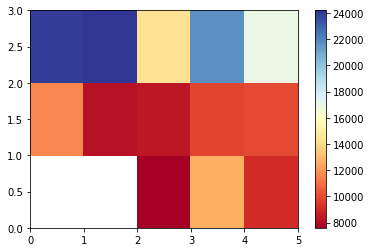

In [10]:
plt.pcolor(pivot_df,cmap='RdYlBu')
plt.colorbar()
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 200
Data columns (total 28 columns):
symboling            201 non-null int64
normalized-losses    201 non-null float64
make                 201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null float64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null float64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null float64
peak-rpm             201 non-null float64
price                20

In [31]:
heatmap_df=df[['symboling', 'normalized-losses','wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-L/100km', 'highway-L/100km',
       'diesel', 'gas', 'std', 'turbo']]


Continuous numerical variables:

Length
Width
Curb-weight
Engine-size
Horsepower
City-mpg
Highway-mpg
Wheel-base
Bore
Categorical variables:

Drive-wheels